In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
IMAGE_SIZE = [224, 224]

base_dir = "Intel Image Dataset"
categories = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob("Intel Image Dataset/*")
folders

In [6]:
x = Flatten()(resnet.output)
x

<KerasTensor: shape=(None, 100352) dtype=float32 (created by layer 'flatten')>

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(base_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2999 images belonging to 6 classes.


    Model Fitting:

- Applying smaller number of epochs due to lack of time and computational power.

In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  epochs=8,
  steps_per_epoch=len(training_set)
)

C:\Users\hp\AppData\Local\Temp\ipykernel_24136\1840876418.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/8
94/94 [==============================] - 164s 2s/step - loss: 1.2561 - accuracy: 0.5679
Epoch 2/8
94/94 [==============================] - 166s 2s/step - loss: 1.1985 - accuracy: 0.5755
Epoch 3/8
94/94 [==============================] - 166s 2s/step - loss: 1.2979 - accuracy: 0.5705
Epoch 4/8
94/94 [==============================] - 166s 2s/step - loss: 1.2145 - accuracy: 0.6032
Epoch 5/8
94/94 [==============================] - 205s 2s/step - loss: 1.2359 - accuracy: 0.5929
Epoch 6/8
94/94 [==============================] - 212s 2s/step - loss: 1.2029 - accuracy: 0.6159
Epoch 7/8
94/94 [==============================] - 196s 2s/step - loss: 0.9783 - accuracy: 0.6489
Epoch 8/8
94/94 [==============================] - 205s 2s/step - loss: 1.2226 - accuracy: 0.6025


- Limited accuracy due to small number of epochs. Concept remains same, just need to apply larger number of epochs.

In [16]:
r.history

{'loss': [1.2560744285583496,
  1.1985015869140625,
  1.2979378700256348,
  1.2144659757614136,
  1.235874056816101,
  1.202900767326355,
  0.9782692790031433,
  1.2226192951202393],
 'accuracy': [0.567855954170227,
  0.575525164604187,
  0.5705235004425049,
  0.6032010912895203,
  0.5928642749786377,
  0.6158719658851624,
  0.6488829851150513,
  0.6025341749191284]}

    Saving Model:

In [ ]:
model.save(r'model.h5')

    Making Predictions:

In [ ]:
path = r'Greist_Building.jpeg'

Image to predict:

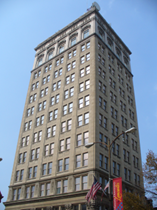

In [ ]:
model = tf.keras.models.load_model(r'model.h5')        # Load model

# Load and preprocess the image:
img = image.load_img(path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = tf.expand_dims(img_array, 0)  # Expand dimensions to create batch size of 1

# Make prediction:
prediction = model.predict(img_array)
predicted_class_index = tf.argmax(prediction, axis=1)
predicted_class = categories[predicted_class_index[0]]

print("Predicted class:", predicted_class)

1/1 [==============================] - 1s 1s/step
Predicted class: buildings


- Hence, prediction is accurate.